# Dimensionality Reduction in Python

#### Métodos Intensivos de Computación Estadística

#### Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.

See https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e.

The main idea of this notebook is to present some dimensionality reduction methods in python and evaluate its results and performance. Specifically, the methods are:
1. [PCA (Principal Component Analysis)](https://en.wikipedia.org/wiki/Principal_component_analysis).
2. [LLE (Locally Linear Embedding)](http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf).
3. [Isomap(Isometric Feature Mapping)](https://en.wikipedia.org/wiki/Isomap). 


In [1]:
#Import the required libraries and functions
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

from scipy.misc import imread

import scipy as sc
import time
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Principal  Component Analysis 
We use an example of __PCA__ using images extracted from https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371).

In [3]:
import warnings
warnings.filterwarnings('ignore')

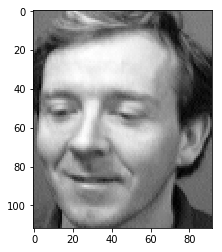

In [8]:
#An example of the images used 

#img = imread("/Users/JuanSebastianCorredorRodriguez/Documents/Git Repositories/Datasets/Att-Faces/s5/1.pgm")
img = imread("/Users/danielmartinez/Documents/Att-Faces/s3/5.pgm")
img = img.astype(np.uint8)
img = img/255
plt.imshow(img, cmap = 'gray')

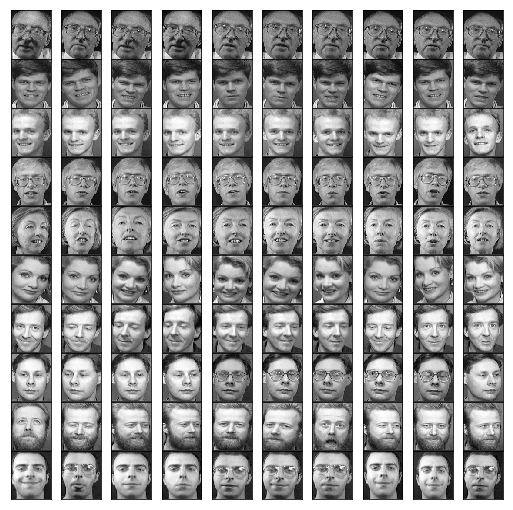

In [34]:
#Load the images and show some of then

from glob import iglob
faces = pd.DataFrame([])
for path in iglob('/Users/danielmartinez/Documents/Att-Faces/*/*.pgm'):
 img=imread(path)
 face = pd.Series(img.flatten(),name=path)
 faces = faces.append(face)
 
fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces.iloc[i].values.reshape(112,92),cmap="gray")

In [48]:
#Let's see how many faces and howe many pixels we have in our dataset 
faces.shape

(400, 10304)

It is clear that we have a high dimensional data (more than 10000 feautres), so a Dimensionality Reduction Method will be very useful. 

So let's see how to implement PCA.

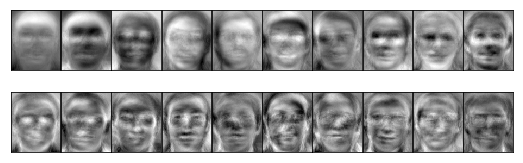

In [50]:
#n_components = p means it will return the Eigenvectors that have the (p*100)% of the variation in the dataset
faces_pca = PCA(n_components = 0.8)
faces_pca.fit(faces)
fig, axes = plt.subplots(2, 10, figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces_pca.components_[i].reshape(112,92), cmap="gray")

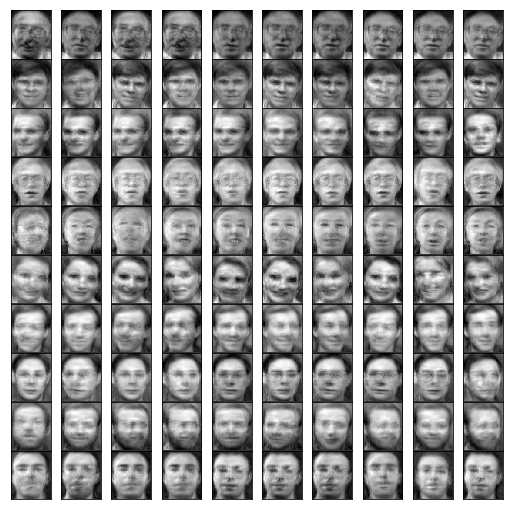

In [51]:
components = faces_pca.transform(faces)
projected = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112,92),cmap="gray")